##### Dimension Estimation using synthetic datasets 

In [244]:
import numpy as np

from sklearn.decomposition import PCA
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

import random

%matplotlib inline

Create a random array $\mathbf{C} = \mathbf{A} \times \mathbf{B}$ 
 - $\mathbf{A}~\epsilon~\mathbb{R}^{119\times5}$
 - $\mathbf{B}~\epsilon~\mathbb{R}^{5\times23}$

In [245]:
A = np.random.rand(119,5)
B = np.random.rand(5, 23)
C = np.matmul(A, B)

In [246]:
 C_norm = (C - C.mean(axis=0))/np.std(C, axis=0)

In [247]:
# -----------------------------------------------------------------------
# average the z values across the day
# see if the z_i >= threshold, in this 
# case 1%, we expect mean z is sent in
# -----------------------------------------------------------------------
def count_gt_threshold(z, threshold):
    tot = sum(z)
    z_pct = [(i/tot) for i in sorted(z, reverse=True)]
    z_gt_theta = [i for i in z_pct if i >= threshold]
    return len(z_gt_theta)

# -----------------------------------------------------------------------
# start adding the largest values first; keep adding 
# till you get 90%
# -----------------------------------------------------------------------
def count_upto_threshold(z, threshold):
    tot = sum(z)
    z_pct = [(i/tot) for i in sorted(z, reverse=True)]
    cum_z_pct = np.cumsum(z_pct)
    for i in range(0, cum_z_pct.shape[0]):
        if cum_z_pct[i] >= threshold:
            return i+1, cum_z_pct
    return cum_z_pct.shape[0], cum_z_pct

Original matrix $\mathbf{C}$

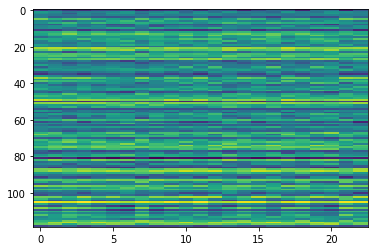

In [248]:
plt.imshow(C_norm, interpolation='nearest', aspect='auto')

Singular Value Decomposition

In [249]:
U_c, S_c, V_c = np.linalg.svd(C_norm)

Plot the singular values

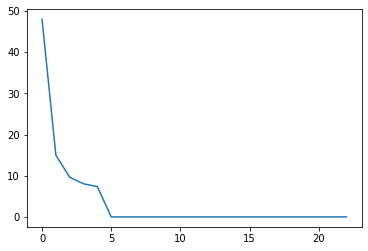

In [250]:
plt.plot(S_c)

In [251]:
gte_threshold_= 0.01 # 1%
upto_threshold_= 0.97 # 97%
gte_dim = count_gt_threshold(z = S, threshold = gte_threshold_)
upto_dim, cum_pct = count_upto_threshold(z = S, threshold = upto_threshold_)
print("Dimension determined by >= {} metric is ==> {}".format(gte_threshold_, gte_dim))
print("Dimension determined by >= {} metric is ==> {}".format(upto_threshold_, upto_dim))

Dimension determined by >= 0.01 metric is ==> 5
Dimension determined by >= 0.97 metric is ==> 5


##### Apply non-linear transformation

We create a matrix $\mathbf{D}~\epsilon~\mathbb{R}^{119\times23}$, by using non-linear functions on columns of $\mathbf{C}~\epsilon~\mathbb{R}^{119\times23}$ and adding it to another randomly selected column of $\mathbf{C}~\epsilon~\mathbb{R}^{119\times23}$.

In [252]:
funcdict = {
    'square' : 'square',
    'cuberoot' : 'cuberoot',
    'four': 'four',
    'root': 'root',
    'fourthroot' : 'fourthroot',
    'sigmoid' : 'sigmoid',
    'tanh' : 'tanh',
    'abs' : 'abs',
    'log' : 'log',
    'exp' : 'exp',
    'sin' : 'sin',
    'arctan' : 'arctan'
}

def get_nonlinear_fn():
    functions = list(funcdict.keys())
    rand_int = np.random.randint(0, 100)
    function_index = rand_int % len(functions)
    function_name = functions[function_index]
    return function_name

def apply_function(col_data, fn):
    if fn == "square":
        return np.power(col_data, 2)
    elif fn == "cuberoot":
        return np.cbrt(np.abs(col_data))
    elif fn == "four":
        return np.power(col_data, 4)
    elif fn == "root":
        return np.power(col_data, 0.5)
    elif fn == "fourthroot":
        return np.power(col_data, 0.25)
    elif fn == "sigmoid":
        return 1/(1 + np.exp(-col_data))
    elif fn == "tanh":
        return np.tanh(col_data)
    elif fn == "abs":
        return np.abs(col_data)
    elif fn == "log":
        return np.log(np.abs(col_data))
    elif fn == "exp":
        return np.exp(col_data)
    elif fn == "sin":
        return np.sin((np.pi/180)*col_data)
    elif fn == "arctan":
        return np.arctan((np.pi/180)*col_data)
    
def apply_nonlinear_transformation(M):
    functions = list(funcdict.keys())
    rand_int = random.sample(range(len(functions)), len(functions))
    D = None
    for col_index in range(M.shape[1]):
        function_index = rand_int[col_index % len(rand_int)]
        fn = functions[function_index]
        if D is None:
            D = apply_function(M[:,col_index], fn)
        else:
            D = np.column_stack((D, apply_function(M[:,col_index], fn)))    
    D_norm = (D - D.mean(axis=0))/np.std(D, axis=0)
    return D_norm

Applying a random non linear transformation to each column and then normalize it.

In [253]:
D = apply_nonlinear_transformation(C)

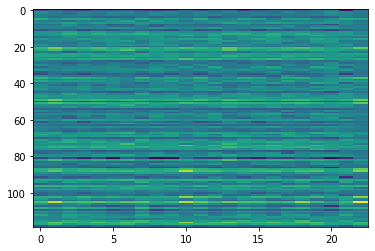

In [254]:
plt.imshow(D, interpolation='nearest', aspect='auto')

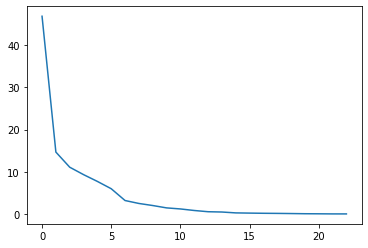

In [255]:
U_d, S_d, V_d = np.linalg.svd(D)
plt.plot(S_d)

In [256]:
gte_threshold_= 0.01 # 1%
upto_threshold_= 0.95 # 97%
gte_dim = count_gt_threshold(z = S_d, threshold = gte_threshold_)
upto_dim, cum_pct = count_upto_threshold(z = S_d, threshold = upto_threshold_)
print("Dimension determined by >= {} metric is ==> {}".format(gte_threshold_, gte_dim))
print("Dimension determined by >= {} metric is ==> {}".format(upto_threshold_, upto_dim))

Dimension determined by >= 0.01 metric is ==> 11
Dimension determined by >= 0.95 metric is ==> 10
